# TODO
- (argmax, max) per speedup e scalabilita
- qualcosa vs dimensione collezione (n) per vedere la gustafson legge

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
results_df = pd.read_csv("../Statistics/service_time_trial.csv")
results_df.head()

,max_nw,active_workers_history,service_time_history,service_time_goal,emitter_elapsed_time_history,workers_elapsed_time_history,collector_elapsed_time_history
0,8,3,142,100,1311,285,733
1,8,3,95,100,17,289,0
2,8,2,72,100,242,150,138
3,8,4,214,100,6,641,750
4,8,5,125,100,472,576,0


### Service Time History

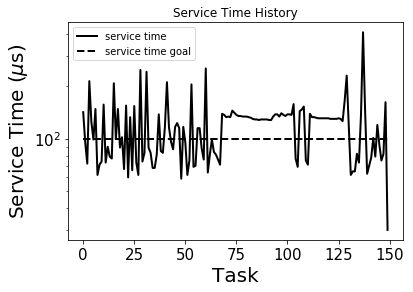

In [43]:
# plot servive_time_history vs service_time_goal
results_df.plot(y=['service_time_history', 'service_time_goal'],
                style=['-', '--'],
                color=['black', 'black'],
                label=['service time', 'service time goal'],
                linewidth=2)

plt.ylabel('Service Time ($\mu$s)', fontsize=20)
plt.xlabel('Task', fontsize=20)
plt.yscale('log')
plt.title('Service Time History')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

### Service Time Error

In [44]:
# plot relative error between  service_time_goal and service_time_history
"""
y1 = np.array(results_df['service_time_history'])
y2 = np.array(results_df['service_time_goal'])

relative_error = (y1-y2)/y2

plt.plot(relative_error)
plt.yscale('log')
plt.ylabel('Relative Error')
plt.xlabel('Task')
plt.title('Service Time Error')
plt.show()
"""

"\ny1 = np.array(results_df['service_time_history'])\ny2 = np.array(results_df['service_time_goal'])\n\nrelative_error = (y1-y2)/y2\n\nplt.plot(relative_error)\nplt.yscale('log')\nplt.ylabel('Relative Error')\nplt.xlabel('Task')\nplt.title('Service Time Error')\nplt.show()\n"

### Throughput

In [45]:
"""
throughput_history = 1/y1
throughtput_goal = 1/y2

plt.plot(throughput_history,'-', color='black', label='throughput history')
plt.plot(throughtput_goal, '--', color='black', label='throughput goal')
plt.xlabel('Tasks')
plt.ylabel('Throughput')
plt.title('Throughput History')
plt.show()
"""

"\nthroughput_history = 1/y1\nthroughtput_goal = 1/y2\n\nplt.plot(throughput_history,'-', color='black', label='throughput history')\nplt.plot(throughtput_goal, '--', color='black', label='throughput goal')\nplt.xlabel('Tasks')\nplt.ylabel('Throughput')\nplt.title('Throughput History')\nplt.show()\n"

### Parallelism Degree

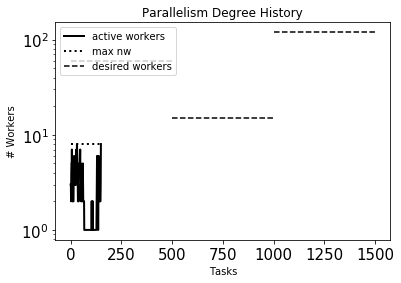

In [46]:
# plot parallelism degree vs max nw
results_df.plot(y=['active_workers_history', 'max_nw'],
                style=['-', ':'],
                color=['black'],
                label=['active workers', 'max nw'], linewidth=2)

# expected workers
plt.hlines(60, 1, 500, linestyle='--', label='desired workers')
plt.hlines(15, 501, 1000, linestyle='--')
plt.hlines(120, 1001, 1500, linestyle='--')

plt.ylabel('# Workers')
plt.xlabel('Tasks')
plt.yscale('log')
plt.legend(loc='upper left')
plt.title('Parallelism Degree History')
plt.show()

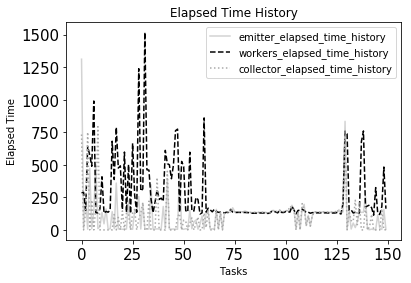

In [47]:
# plot emitter, workers and collector elapsed time history
results_df.plot(y=['emitter_elapsed_time_history','workers_elapsed_time_history','collector_elapsed_time_history'],
                style=['-', '--', ':'],
                color=['lightgray', 'black', 'darkgray'])
plt.ylabel('Elapsed Time')
plt.xlabel('Tasks')
plt.title('Elapsed Time History')
plt.show()

### Completion Time

In [48]:
tc_vs_nw_df = pd.read_csv('../Statistics/completion_time_vs_nw.csv')
tc_vs_nw_df.head()

,nw,completion_time
0,1,1039671
1,2,519240
2,3,348801
3,4,262814
4,5,256425


In [51]:
sequential_time = pd.read_csv('../Statistics/sequential_time.csv')
tseq = sequential_time['sequential_time']
sequential_time

,sequential_time
0,1000259


In [53]:
nw = tc_vs_nw_df['nw']
ideal_parallel_time = [tseq/n for n in nw]

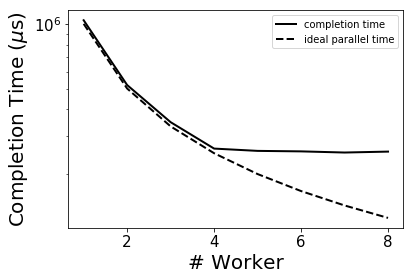

In [54]:
tc_vs_nw_df.plot(x='nw', y='completion_time', style='-', color='black', 
                 linewidth=2, label='completion time')
plt.plot(nw, ideal_parallel_time, linestyle='--', color='black',
         linewidth=2, label='ideal parallel time')

plt.yscale('log')
plt.xlabel('# Worker', fontsize=20)
plt.ylabel('Completion Time ($\mu$s)', fontsize=20)
plt.legend(loc='best')
#plt.title('Completion Time')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

In [55]:
print("min completion time:", np.min(tc_vs_nw_df['completion_time']), 
      "obtained with", np.argmin(tc_vs_nw_df['completion_time'])+1, "workers")

min completion time: 251953 obtained with 7 workers


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


### Scalability

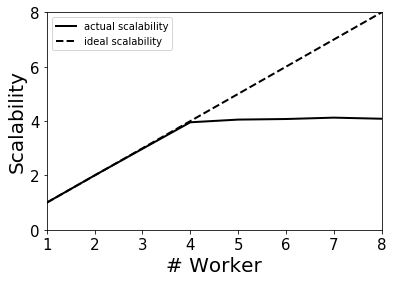

In [56]:
# scalability
tc = tc_vs_nw_df['completion_time']
nw = tc_vs_nw_df['nw']

scalability = [tc[0]/float(t) for t in tc]

plt.plot(nw, scalability, linestyle='-', label='actual scalability', color='black', linewidth=2)
plt.plot(nw, nw, linestyle='--', label='ideal scalability', color='black', linewidth=2)
plt.legend(loc='best')
plt.xlabel('# Worker', fontsize=20)
plt.ylabel('Scalability', fontsize=20)
plt.ylim([0, np.max(nw)])
plt.xlim([1, np.max(nw)])
#plt.title('Scalability')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

In [57]:
n_worker, max_scalability = np.argmax(scalability), np.max(scalability)
print("max scalability:", round(max_scalability,4), "obtained with", n_worker+1, "workers")

max scalability: 4.1264 obtained with 7 workers


### Speedup

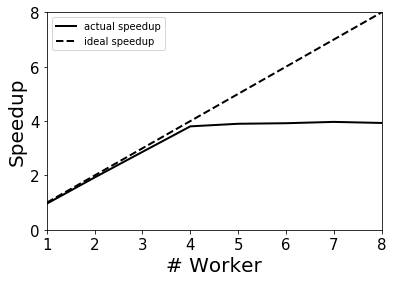

In [59]:
# speedup
tc = tc_vs_nw_df['completion_time']

speedup = [tseq/float(t) for t in tc]

plt.plot(nw, speedup, linestyle='-', label='actual speedup', color='black', linewidth=2)
plt.plot(nw, nw, linestyle='--', label='ideal speedup', color='black', linewidth=2)
plt.legend(loc='best')
plt.xlabel('# Worker', fontsize=20)
plt.ylabel('Speedup', fontsize=20)
plt.ylim([0, np.max(nw)])
plt.xlim([1, np.max(nw)])
#plt.title('Speedup')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

In [60]:
n_worker, max_speedup = np.argmax(speedup), np.max(speedup)
print("max speedup:", round(max_speedup,4), "obtained with", n_worker+1, "workers")

max speedup: 3.97 obtained with 7 workers


### Efficiency

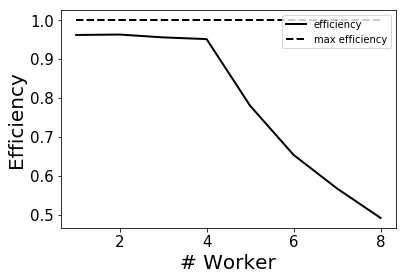

In [61]:
efficiency = [ sp/float(n) for n, sp in zip(nw, speedup)]
plt.hlines(1, 1, max(nw), linestyle='--', label='max efficiency', linewidth=2)
plt.plot(nw, efficiency, color='black', label='efficiency', linewidth=2)
plt.xlabel('# Worker', fontsize=20)
plt.ylabel('Efficiency', fontsize=20)
#plt.title('Efficiency')
plt.legend(loc='best')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

In [62]:
print("max efficiency:", np.max(efficiency), "with nw=", np.argmax(efficiency)+1)
print("min efficiency:", np.min(efficiency), "with nw=", np.argmin(efficiency)+1)

max efficiency: 0.9631952468993144 with nw= 2
min efficiency: 0.4913886781923151 with nw= 8


### Alpha
- colonna 1: alpha
- colonna 2: ts_goal
- colonna 3-fine: service_time_history

In [63]:
ts_vs_alpha_df = pd.read_csv("../Statistics/service_time_history_vs_alpha.csv", header=None)
#ts_vs_alpha_df.head()

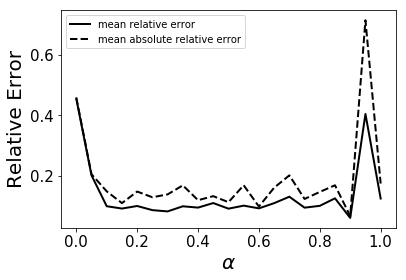

In [64]:
#ts_vs_alpha_df.loc[0, 1:]
alpha_values = ts_vs_alpha_df.loc[:,0]
ts_goal = ts_vs_alpha_df.loc[0,1]

ts_histories = np.array(ts_vs_alpha_df.loc[:, 2:])
n_alpha, n_tasks = ts_histories.shape

ts_goal = np.full((n_tasks),ts_goal)

rel_errors = np.array([(ts - ts_goal)/ts_goal for ts in ts_histories])

mean_rel_error = np.mean(rel_errors, 1)
mean_abs_rel_error = np.mean(np.abs(rel_errors), 1)

plt.plot(alpha_values, mean_rel_error, label='mean relative error', linestyle='-', color='black', linewidth=2)
plt.plot(alpha_values, mean_abs_rel_error, label='mean absolute relative error', linestyle='--', color='black', linewidth=2)
plt.legend(loc='best')
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel('Relative Error', fontsize=20)
#plt.title('Alpha')
plt.show()

In [65]:
print("min rel error:", round(np.min(mean_rel_error),4), "obtained with alpha:", alpha_values[np.argmin(mean_rel_error)])
print("min abs rel error:", round(np.min(mean_abs_rel_error),4), "obtained with alpha:", alpha_values[np.argmin(mean_abs_rel_error)])

min rel error: 0.0605 obtained with alpha: 0.9
min abs rel error: 0.0665 obtained with alpha: 0.9


### Max speedup / scalability vs task size

In [69]:
# load task_size vs sequential_time 
task_size_vs_tseq_df = pd.read_csv('../Statistics/task_size_vs_sequential_time.csv')

task_sizes = task_size_vs_tseq_df['task_size']
sequential_times = task_size_vs_tseq_df['sequential_time']

task_size_vs_tseq_df.head()

,task_size,sequential_time
0,125,125157
1,250,250182
2,500,500281
3,1000,1000362
4,2000,2000216


In [70]:
# load completion_time vs nw for each task size
tc_vs_nw_df_list = []
for task_size in task_sizes:
    df = pd.read_csv('../Statistics/TaskSize/completion_time_vs_nw_task_size_' + 
                     str(task_size) + '.csv')
    tc_vs_nw_df_list.append(df)

tc_vs_nw_df_list[0].head()

,nw,completion_time
0,1,142752
1,2,69502
2,3,48620
3,4,43707
4,5,43206


In [74]:
max_speedups = []
nw_max_speedups = []
max_scalabilities = []

speedups_list = []

for i in range(len(tc_vs_nw_df_list)):
    tseq = sequential_times[i]
    tc_list = tc_vs_nw_df_list[i]['completion_time']
    
    speedup = [tseq/float(tc) for tc in tc_list]
    scalability = [tc_list[0]/float(tc) for tc in tc_list]
    
    max_speedups.append(np.max(speedup))
    nw_max_speedups.append(np.argmax(speedup)+1)
    max_scalabilities.append(np.max(scalability))
    
    speedups_list.append(speedup)

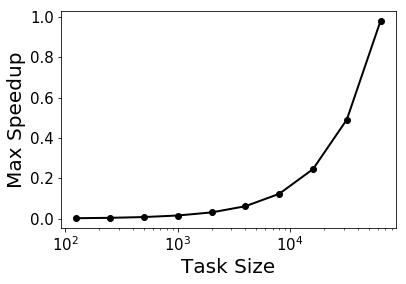

In [37]:
plt.plot(task_sizes, max_speedups, 'o-', color='black', label='max speedup', linewidth=2)
#plt.plot(task_sizes, max_scalabilities, 'x-', color='grey', label='max scalability')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Max Speedup', fontsize=20)
plt.xlabel('Task Size', fontsize=20)
#plt.title('Max Speedup vs Task Size')
plt.show()

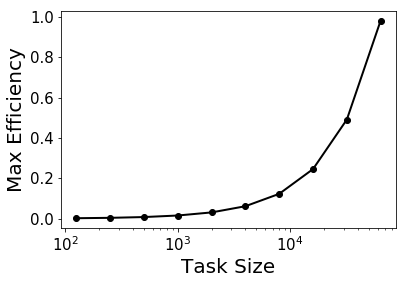

In [38]:
# max efficiency
max_efficiencies = [ float(sp)/nw for nw, sp in zip(nw_max_speedups, max_speedups)]
plt.plot(task_sizes, max_efficiencies, '-o', color='black', linewidth=2)
plt.ylabel('Max Efficiency', fontsize=20)
plt.xlabel('Task Size', fontsize=20)
#plt.title('Max Efficiency vs Task Size')
plt.xscale('log')
plt.show()

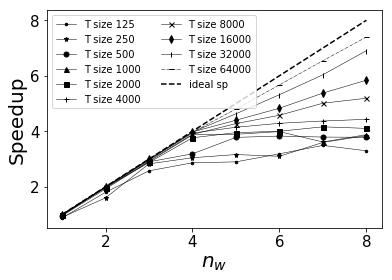

In [123]:
# all speedups for each task size vs nw
linestyles = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-.']
markers = ['.', '*', 'o','^', 's', '+', 'x', 'd', '|', '_']

for task_size, sp, ls, ms in zip(task_sizes, speedups_list, linestyles, markers):
    plt.plot(nw, sp, label='T size ' + str(task_size), 
             linestyle=ls, marker=ms, color='black', linewidth=0.5, markersize=5)

plt.plot(nw, nw, label='ideal sp', linestyle='--', color='k')

plt.xlabel(r'$n_w$', fontsize=20)
plt.ylabel('Speedup', fontsize=20)
plt.legend(loc='upper left', ncol=2, fancybox=True)
plt.show()

### Max Speedup / Scalability vs Collection Size

In [124]:
# load coll_size vs sequential_time 
coll_size_vs_tseq_df = pd.read_csv('../Statistics/collection_size_vs_sequential_time.csv')
coll_size_vs_tseq_df.head()

coll_sizes = coll_size_vs_tseq_df['collection_size']
sequential_times = coll_size_vs_tseq_df['sequential_time']
coll_size_vs_tseq_df.head()

,collection_size,sequential_time
0,100,100013
1,200,200023
2,400,400060
3,800,800184
4,1600,1600524


In [126]:
# load completion_time vs nw for each coll size
tc_vs_nw_df_list_coll = []
for coll_size in coll_sizes:
    df = pd.read_csv('../Statistics/CollSize/completion_time_vs_nw_coll_size_' + 
                     str(coll_size) + '.csv')
    tc_vs_nw_df_list_coll.append(df)

tc_vs_nw_df_list_coll[0].head()

,nw,completion_time
0,1,103752
1,2,50867
2,3,34461
3,4,30458
4,5,29008


In [131]:
max_speedups = []
nw_max_speedups = []
max_scalabilities = []

speedups_list = []

for i in range(len(tc_vs_nw_df_list)):
    tseq = sequential_times[i]
    tc_list = tc_vs_nw_df_list_coll[i]['completion_time']
    speedup = [tseq/float(tc) for tc in tc_list]
    scalability = [tc_list[0]/float(tc) for tc in tc_list]
    
    nw_max_speedups.append(np.argmax(speedup)+1)
    max_speedups.append(np.max(speedup))
    max_scalabilities.append(np.max(scalability))
    
    speedups_list.append(speedup)

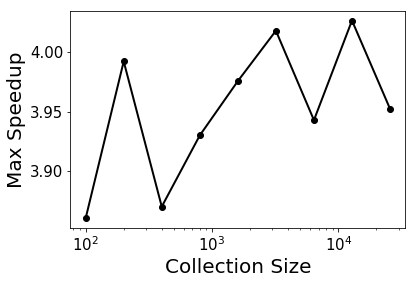

In [132]:
plt.plot(coll_sizes, max_speedups, 'o-', color='black', label='max speedup', linewidth=2)
#plt.plot(coll_sizes, max_scalabilities, 'x-', color='grey', label='max scalability')
plt.xscale('log')
plt.ylabel('Max Speedup', fontsize=20)
plt.xlabel('Collection Size', fontsize=20)
plt.show()

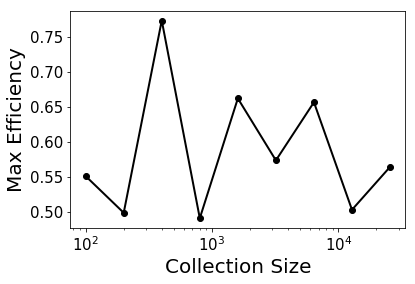

In [133]:
# max efficiency
max_efficiencies = [ float(sp)/nw for nw, sp in zip(nw_max_speedups, max_speedups)]
plt.plot(coll_sizes, max_efficiencies, '-o', color='black', linewidth=2)
plt.ylabel('Max Efficiency', fontsize=20)
plt.xlabel('Collection Size', fontsize=20)
plt.xscale('log')
plt.show()

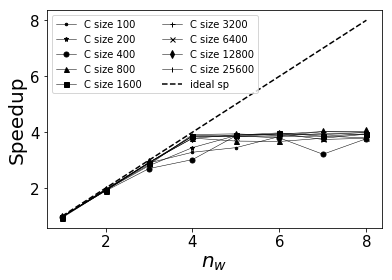

In [135]:
# all speedups for each collection size vs nw
linestyles = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-.']
markers = ['.', '*', 'o','^', 's', '+', 'x', 'd', '|', '_']

for coll_size, sp, ls, ms in zip(coll_sizes, speedups_list, linestyles, markers):
    plt.plot(nw, sp, label='C size ' + str(coll_size), 
             linestyle=ls, marker=ms, color='black', linewidth=0.5, markersize=5)

plt.plot(nw, nw, label='ideal sp', linestyle='--', color='k')

plt.xlabel(r'$n_w$', fontsize=20)
plt.ylabel('Speedup', fontsize=20)
plt.legend(loc='upper left', ncol=2, fancybox=True)
plt.show()